In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor

In [2]:
X = np.load('updated_data/function_1/inputs.npy')
Y = np.load('updated_data/function_1/outputs.npy')

# Upper Confidence Bound

In [3]:
gpr = GaussianProcessRegressor()
gpr.fit(X, Y)

GaussianProcessRegressor()

In [4]:
# to optimize the acquisition function, we will simply use gridsearch over a space of 10.000 gridpoints
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)

In [5]:
X_grid = []
for i in range(len(x1)):
    for j in range(len(x2)):
        X_grid.append([x1[i], x2[j]])

In [6]:
from shared import FormatOutputs, ProbImprovementAF

X_grid = np.array(X_grid)
mean, std = gpr.predict(X_grid, return_std = True)
ucb = mean + 1.96 * std
pi = ProbImprovementAF(mean,std,np.max(Y))

#ucb
idx_max = np.argmax(ucb)
next_query = X_grid[idx_max]
FormatOutputs(next_query, "ucb")

#probability of improvemnet
idx_max = np.argmax(pi)
next_query = X_grid[idx_max]
FormatOutputs(next_query, "prob of improvement")

0.000001-0.000001: ucb
0.151515-0.434343: prob of improvement


## Visualizing our data and thinking of the problem

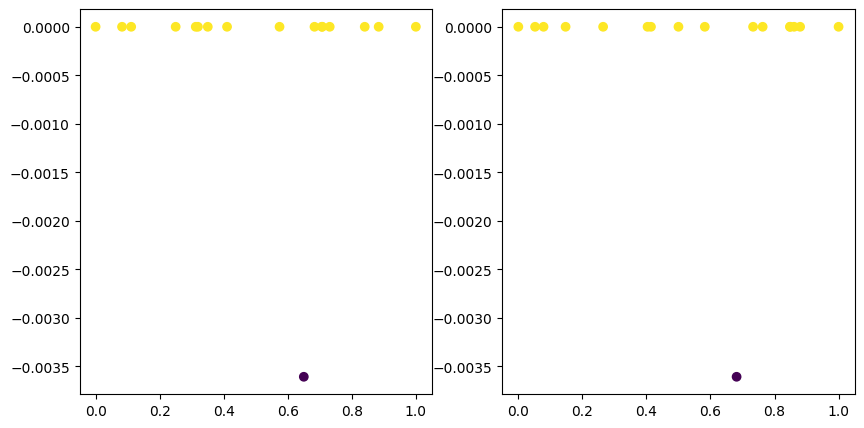

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_figheight(5)
fig.set_figwidth(10)
ax1.scatter(X[:, 0], Y, c = Y)
ax2.scatter(X[:,1], Y, c = Y)